In [6]:
import pandas as pd
nobel = pd.read_csv("nobels.csv")

In [8]:
nobel["share"].describe()

count    967.000000
mean       2.002068
std        0.929166
min        1.000000
25%        1.000000
50%        2.000000
75%        3.000000
max        4.000000
Name: share, dtype: float64

In [9]:
nobel["bornCountryCode"].describe()

count     941
unique     76
top        US
freq      275
Name: bornCountryCode, dtype: object

<Axes: title={'center': 'age'}, xlabel='category'>

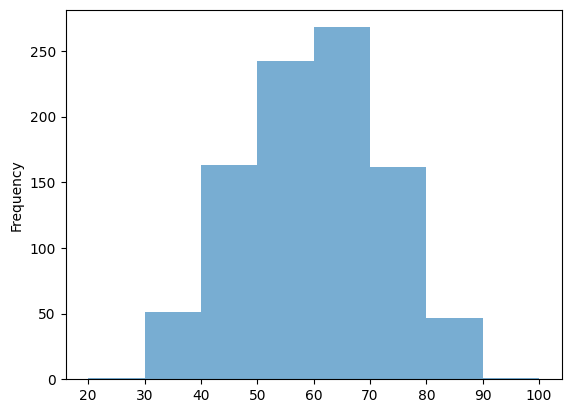

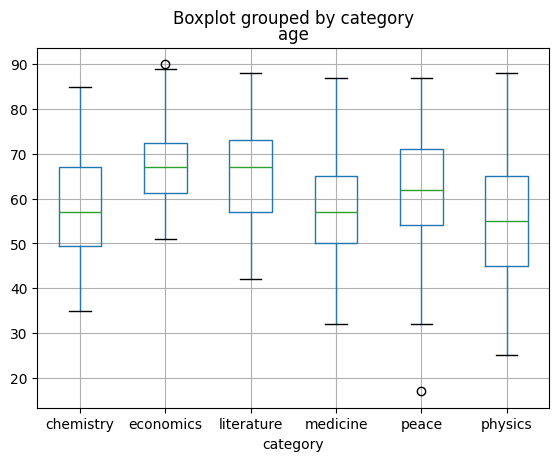

In [18]:
nobel["born"] = pd.to_datetime(nobel["born"],
                               errors ='coerce')
nobel["age"] = nobel["year"] - nobel["born"].dt.year
nobel["age"].plot.hist(bins=[20,30,40,50,60,70,80,90,100], alpha=0.6);
nobel.boxplot(column="age", by="category")

In [20]:
nobel.loc[nobel["bornCountry"] == "Sweden"]

,id,firstname,surname,born,died,bornCountry,bornCountryCode,bornCity,diedCountry,diedCountryCode,...,gender,year,category,overallMotivation,share,motivation,name,city,country,age
16,17,Nils Gustaf,Dalén,1869-11-30,1937-12-09,Sweden,SE,Stenstorp,Sweden,SE,...,male,1912.0,physics,NaN,1.0,"""for his invention of automatic regulators for...",Swedish Gas-Accumulator Co.,Lidingö-Stockholm,Sweden,43.0
28,29,Karl Manne Georg,Siegbahn,1886-12-03,1978-09-26,Sweden,SE,Lund,Sweden,SE,...,male,1924.0,physics,NaN,1.0,"""for his discoveries and research in the field...",Uppsala University,Uppsala,Sweden,38.0
95,91,Hannes Olof Gösta,Alfvén,1908-05-30,1995-04-02,Sweden,SE,Norrköping,Sweden,SE,...,male,1970.0,physics,NaN,2.0,"""for fundamental work and discoveries in magne...",Royal Institute of Technology,Stockholm,Sweden,62.0
124,120,Kai M.,Siegbahn,1918-04-20,2007-07-20,Sweden,SE,Lund,Sweden,SE,...,male,1981.0,physics,NaN,2.0,"""for his contribution to the development of hi...",Uppsala University,Uppsala,Sweden,63.0
168,162,Svante August,Arrhenius,1859-02-19,1927-10-02,Sweden,SE,Vik,Sweden,SE,...,male,1903.0,chemistry,NaN,1.0,"""in recognition of the extraordinary services ...",Stockholm University,Stockholm,Sweden,44.0
187,183,The (Theodor),Svedberg,1884-08-30,1971-02-25,Sweden,SE,Fleräng,Sweden,SE,...,male,1926.0,chemistry,NaN,1.0,"""for his work on disperse systems""",Uppsala University,Uppsala,Sweden,42.0
217,208,Arne Wilhelm Kaurin,Tiselius,1902-08-10,1971-10-29,Sweden,SE,Stockholm,Sweden,SE,...,male,1948.0,chemistry,NaN,1.0,"""for his research on electrophoresis and adsor...",Uppsala University,Uppsala,Sweden,46.0
320,305,Allvar,Gullstrand,1862-06-05,1930-07-28,Sweden,SE,Landskrona,Sweden,SE,...,male,1911.0,medicine,NaN,1.0,"""for his work on the dioptrics of the eye""",Uppsala University,Uppsala,Sweden,49.0
378,359,Axel Hugo Theodor,Theorell,1903-07-06,1982-08-15,Sweden,SE,Linköping,Sweden,SE,...,male,1955.0,medicine,NaN,1.0,"""for his discoveries concerning the nature and...","Karolinska Institutet, Nobel Medical Institute",Stockholm,Sweden,52.0
415,395,Ulf,von Euler,1905-02-07,1983-03-09,Sweden,SE,Stockholm,Sweden,SE,...,male,1970.0,medicine,NaN,3.0,"""for their discoveries concerning the humoral ...",Karolinska Institutet,Stockholm,Sweden,65.0


In [23]:
import numpy as np
nobel["number"] = 1.0
countries = np.array(["Sweden", "United Kingdom", "France", "Denmark"])
nobel2 = nobel.loc[nobel['bornCountry'].isin(countries)]

In [25]:
table = nobel2.pivot_table(values="number", index="bornCountry",
                           columns="category", aggfunc=np.sum)
table

/var/folders/xv/t0_6_8dj5r9dy48hspf62wrh0000gn/T/ipykernel_64882/219678625.py:1: FutureWarning: The provided callable <function sum at 0x10696a480> is currently using DataFrameGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  table = nobel2.pivot_table(values="number", index="bornCountry",


category,chemistry,economics,literature,medicine,peace,physics
bornCountry,,,,,,
Denmark,1.0,NaN,4.0,3.0,1.0,2.0
France,10.0,3.0,11.0,12.0,9.0,8.0
Sweden,4.0,2.0,7.0,7.0,5.0,4.0
United Kingdom,22.0,7.0,6.0,26.0,5.0,22.0


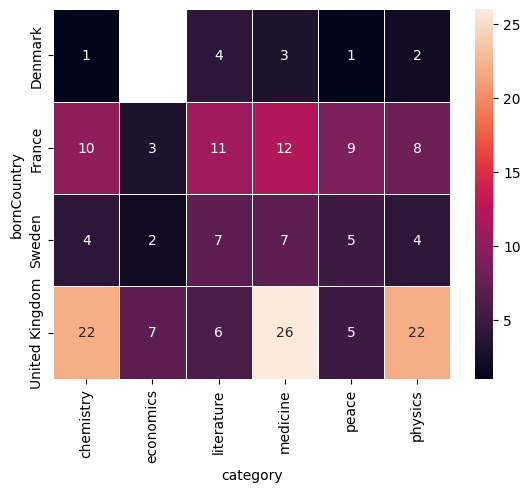

In [27]:
import seaborn as sns
sns.heatmap(table,linewidths=.5, annot=True);

In [28]:
from IPython.core.magic import register_cell_magic

In [30]:
%%writefile cpp_ext.py
def cpp(line, cell):
    """Compile, execute C++ code, and return the standard output."""

    # We first retrieve the current IPython interpreter instance.
    ip = get_ipython()
    # We define the source and executable filenames.
    source_filename = '_temp.cpp'
    program_filename = '_temp'
    # We write the code to the C++ file.
    with open(source_filename, 'w') as f:
        f.write(cell)
    # We compile the C++ code into an executable.
    compile = ip.getoutput("g++ {0:s} -o {1:s}".format(
        source_filename, program_filename))
    # We execute the executable and return the output.
    output = ip.getoutput('./{0:s}'.format(program_filename))
    print('\n'.join(output))

def load_ipython_extension(ipython):
    ipython.register_magic_function(cpp,'cell')

Overwriting cpp_ext.py


In [32]:
%load_ext cpp_ext

The cpp_ext extension is already loaded. To reload it, use:
  %reload_ext cpp_ext


In [34]:
%%cpp?

In [38]:
%%cpp
#include <iostream>
using namespace std;

int main()
{
    cout << "Hello, World!"<<endl;
    return 0;
}


Hello, World!
